In [427]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Specify each path

In [428]:
data = 'model/keypoint_classifier/keypoint.csv' #csv is a file format that stores tabular data (numbers and text) in plain text.
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5' #hdf5 is a file format that stores large amounts of numerical data.

# Classification number setting

In [429]:
labels = 8 #number of labels

# Load training data

In [430]:
# Split the data into training and test sets
X_dataset = np.loadtxt(data, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [431]:
y_dataset = np.loadtxt(data, delimiter=',', dtype='int32', usecols=(0)) 

In [432]:
# Split the data into training and test sets
RANDOM_SEED = 42 #what it does is to make the random numbers predictable and reproducible so that you can get the same results each time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.70, random_state=RANDOM_SEED)

# Model construction

In [433]:
model = tf.keras.models.Sequential([
#layers input
tf.keras.layers.Input((21 * 2,)), 

#dropout layer
tf.keras.layers.Dropout(0.2), 

#dense layer with relu activation
tf.keras.layers.Dense(20, activation='relu'),

#dropout layer
tf.keras.layers.Dropout(0.4), 

#dense layer with relu activation
tf.keras.layers.Dense(10, activation='relu'),

#dense layer with softmax activation
tf.keras.layers.Dense(labels, activation='softmax')
])

In [434]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_35 (Dropout)        (None, 42)                0         
                                                                 
 dense_53 (Dense)            (None, 20)                860       
                                                                 
 dropout_36 (Dropout)        (None, 20)                0         
                                                                 
 dense_54 (Dense)            (None, 10)                210       
                                                                 
 dense_55 (Dense)            (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [435]:
# Model checkpoint callback is a callback that saves a model or weights at some frequency.
cp_callback = tf.keras.callbacks.ModelCheckpoint( #save the model after every epoch.
    model_save_path, verbose=1, save_weights_only=False) #save_weights_only=False means that the model is saved as a whole.
# Early stopping callback is a callback that stops training when a monitored metric has stopped improving.
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)#patience=20 means that the training will stop after 20 epochs if the validation loss does not improve.

In [436]:
#model compile is a step where you specify the loss function, the optimizer, and the metrics you want to use to evaluate your model.
model.compile(
    optimizer='adam',#optimizer is the algorithm that is used to update the weights of the network.
    loss='sparse_categorical_crossentropy', #loss function is the function that is used to evaluate how well the model is performing.
    metrics=['accuracy'], #metrics is a list of metrics that you want to evaluate your model on.
)

# Model training

In [437]:
history = model.fit(
    X_train,#X_train is the training data.
    y_train,#y_train is the training labels.
    epochs=100,#epochs is the number of times the model will be trained on the entire dataset.
    batch_size=32,#batch_size is the number of samples that will be propagated through the network.
    validation_data=(X_test, y_test), #validation_data is the data that you want to use to evaluate your model during training.
    callbacks=[cp_callback, es_callback] #callbacks is a list of callbacks that you want to use during training.
)

Epoch 1/100
 1/20 [>.............................] - ETA: 10s - loss: 2.1564 - accuracy: 0.1250
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 1s 10ms/step - loss: 2.0824 - accuracy: 0.1579 - val_loss: 1.9621 - val_accuracy: 0.3160
Epoch 2/100
 1/20 [>.............................] - ETA: 0s - loss: 2.0423 - accuracy: 0.1875
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.9660 - accuracy: 0.2472 - val_loss: 1.8643 - val_accuracy: 0.3978
Epoch 3/100
 1/20 [>.............................] - ETA: 0s - loss: 1.9333 - accuracy: 0.2188
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.8933 - accuracy: 0.2903 - val_loss: 1.7870 - val_accuracy: 0.5725
Epoch 4/100
 1/20 [>.............................] - ETA: 0s - loss: 1.9239 - accuracy: 0.1875
Epo

In [438]:
# Evaluate model performance on test data set after training
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=32)

9/9 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8290


In [439]:
# Load model from checkpoint
model = tf.keras.models.load_model(model_save_path)

In [440]:
# Evaluate model performance on test data set after loading
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result)) #function is used when we want to remove single-dimensional entries from the shape of an array.
print(np.argmax(np.squeeze(predict_result))) # function returns the indices of the maximum values along an axis.

1/1 [==============================] - 0s 60ms/step
[0.38378412 0.02631044 0.13418137 0.00091398 0.00063681 0.1268843
 0.32332143 0.00396759]
0


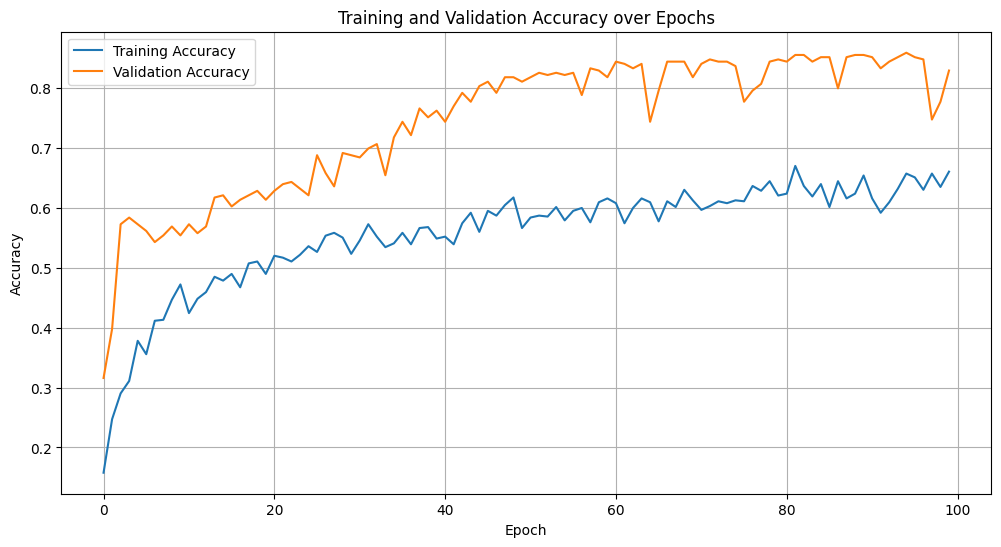

In [441]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend(loc='best')
plt.grid()
plt.show() 

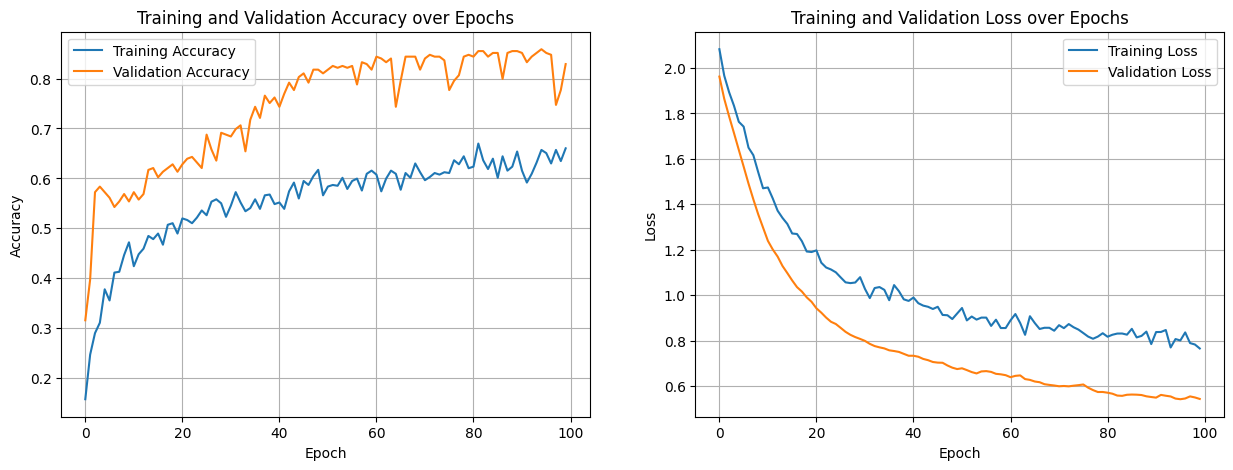

In [442]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) #is the size of the figure.

    # Plot training and validation accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Training and Validation Accuracy over Epochs')
    ax1.legend()
    ax1.grid()

    # Plot training and validation loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training and Validation Loss over Epochs')
    ax2.legend()
    ax2.grid()

    plt.show()

# Plot the training history using the 'history' object from the model.fit() function
plot_training_history(history)


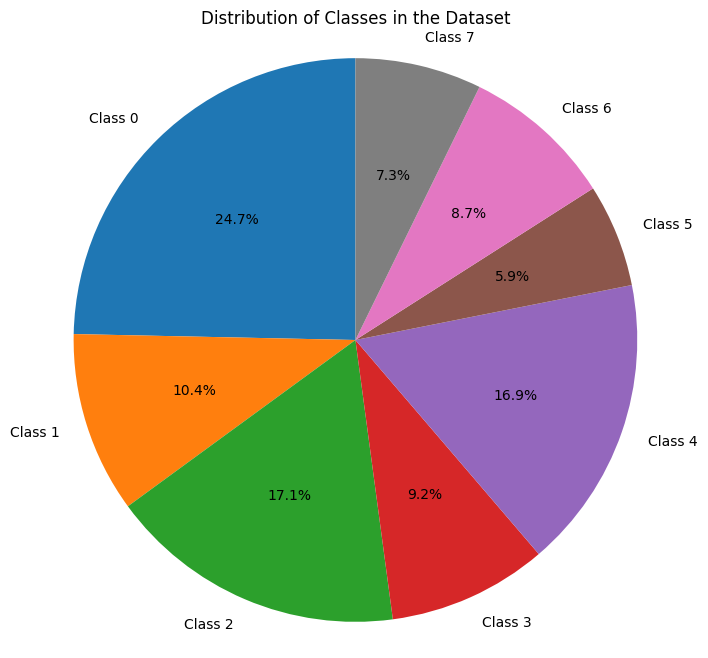

In [425]:
def plot_class_distribution(y_dataset, num_classes): #function to plot the class distribution in the dataset.
    class_counts = np.bincount(y_dataset) #function is used to count the number of occurrences of each value in an array of non-negative integers.
    class_labels = [f"Class {i}" for i in range(num_classes)]

    plt.figure(figsize=(8, 8))
    plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.title('Distribution of Classes in the Dataset')
    plt.show()

# Plot the class distribution in the dataset using the 'y_dataset' labels
plot_class_distribution(y_dataset, labels)


# Confusion matrix

9/9 [==============================] - 0s 1ms/step


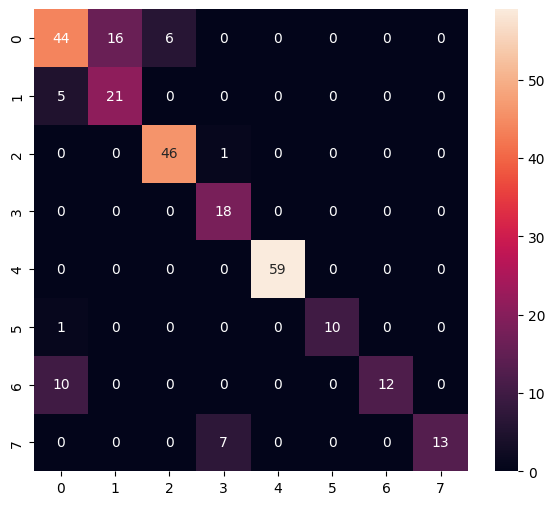

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        66
           1       0.57      0.81      0.67        26
           2       0.88      0.98      0.93        47
           3       0.69      1.00      0.82        18
           4       1.00      1.00      1.00        59
           5       1.00      0.91      0.95        11
           6       1.00      0.55      0.71        22
           7       1.00      0.65      0.79        20

    accuracy                           0.83       269
   macro avg       0.86      0.82      0.82       269
weighted avg       0.85      0.83      0.83       269



In [443]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report #function is used to evaluate the accuracy of a classification.

def print_confusion_matrix(y_true, y_pred, report=True): #function to print the confusion matrix.
    labels = sorted(list(set(y_true))) #function is used to sort the elements of a given iterable in a specific order.
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels) #function is used to compute confusion matrix to evaluate the accuracy of a classification.
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels) #function is used to convert the given data to a pandas DataFrame.
 
    fig, ax = plt.subplots(figsize=(7, 6)) #is the size of the figure.
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False) #function is used to plot rectangular data as a color-encoded matrix.
    ax.set_ylim(len(set(y_true)), 0) #function is used to set the y-limits of the current axes.
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred)) #function is used to evaluate the accuracy of a classification.

Y_pred = model.predict(X_test) #function is used to predict the output for the input samples.
y_pred = np.argmax(Y_pred, axis=1) #function returns the indices of the maximum values along an axis.

print_confusion_matrix(y_test, y_pred)

# Convert to Tensorflow-Lite model

In [444]:
# Save as inference-only model
model.save(model_save_path, include_optimizer=False)

In [445]:
#Transform (quantize) the model
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Default optimizations.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
# Save the quantized TensorFlow Lite model to a file
open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\shetb\AppData\Local\Temp\tmp7f2dtyut\assets


INFO:tensorflow:Assets written to: C:\Users\shetb\AppData\Local\Temp\tmp7f2dtyut\assets


6800

# Inference test

In [446]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path) #function is used to load the model from the file path.
interpreter.allocate_tensors()  # Allocate memory for the model

In [447]:
#Get input and output tensors
input_details = interpreter.get_input_details() #function is used to get the input details of the model.
output_details = interpreter.get_output_details() #function is used to get the output details of the model.

In [448]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]])) #function is used to set the input tensor.

In [449]:
%%time
# Inference
interpreter.invoke() #function is used to invoke the interpreter.
tflite_results = interpreter.get_tensor(output_details[0]['index']) #function is used to get the output tensor.

Wall time: 0 ns


In [450]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.383784   0.02631043 0.13418135 0.00091398 0.00063681 0.1268843
 0.32332146 0.00396759]
0
